In [1]:
import fanta
import config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scores txt files

### Gianluca | La mamma di Enrico

In [2]:
%%writefile gianluca.txt
gg pf ps gs c mdif
1 68 64 1 0 0.5

Overwriting gianluca.txt


### Fabio | Porti Chiusi Italiani

In [3]:
%%writefile fabio.txt
gg pf ps gs c mdif
1 76 88.5 0 1 1

Overwriting fabio.txt


### Enrico | Gianlucanonpressare

In [4]:
%%writefile enrico.txt
gg pf ps gs c mdif
1 88.5 76 1 2 0

Overwriting enrico.txt


### Gabriele | Sciagura

In [5]:
%%writefile gabriele.txt
gg pf ps gs c mdif
1 73 78 1 0 1

Overwriting gabriele.txt


### Luca | Nottingham Forrest Gump

In [6]:
%%writefile luca.txt
gg pf ps gs c mdif
1 78 73 2 0 0.5

Overwriting luca.txt


### Riccardo | Lagggente

In [7]:
%%writefile riccardo.txt
gg pf ps gs c mdif
1 64 68 1 3 0

Overwriting riccardo.txt


# Data

In [8]:
df_final = fanta.configure_db()

### Global variables and stats #############################
games = max(df_final.index)   # Total number of matchdays, including uncompleted ones
games_completed = len(df_final.index.unique())   # Total number of matchdays completed
fp_mean = np.mean(df_final['fantapoints made'])
fp_med = np.median(df_final['fantapoints made'])
fp_std = np.std(df_final['fantapoints made'])
gm_mean = np.mean(df_final['GM'])
gm_med = np.median(df_final['GM'])
gm_std = np.std(df_final['GM'])

df_total = fanta.total_df(df_final)

### Cumulative Data

In [9]:
param=['pos', 'points', 'distance', 'fantapoints made', 'rank', 'fantapoints against',
       'results', 'GM', 'GA', 'goals against gk',
      'cards', 'defense modifier', 'f_close_games', 'f_day_average', 'Luck Index'
      ] # Parameters to display
display(df_total[param].sort_values(by=['points', 'fantapoints made'], ascending=False))

,pos,points,distance,fantapoints made,rank,fantapoints against,results,GM,GA,goals against gk,cards,defense modifier,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,,,,
enrico,1,3,0,88.5,1,76.0,"1W,0T,0L",5,3,1,2,0.0,0.0,0.0,0.0
luca,2,3,0,78.0,2,73.0,"1W,0T,0L",3,2,2,0,0.5,0.0,1.0,1.0
gianluca,3,3,0,68.0,5,64.0,"1W,0T,0L",1,0,1,0,0.5,0.4,2.4,2.8
fabio,4,0,3,76.0,3,88.5,"0W,0T,1L",3,5,0,1,1.0,0.0,-2.0,-2.0
gabriele,5,0,3,73.0,4,78.0,"0W,0T,1L",2,3,1,0,1.0,0.0,-1.2,-1.2
riccardo,6,0,3,64.0,6,68.0,"0W,0T,1L",0,1,1,3,0.0,-0.2,0.0,-0.2


### Last Matchday

In [10]:
df_last_day = df_final[df_final.index==games]
df_last_day.set_index('team', inplace=True)
display(df_last_day)

,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
team,,,,,,,,,,,,
enrico,88.5,76.0,1,2,0.0,5,3,W,3,0.0,0.0,0.0
fabio,76.0,88.5,0,1,1.0,3,5,L,0,0.0,-2.0,-2.0
gabriele,73.0,78.0,1,0,1.0,2,3,L,0,0.0,-1.2,-1.2
gianluca,68.0,64.0,1,0,0.5,1,0,W,3,0.4,2.4,2.8
luca,78.0,73.0,2,0,0.5,3,2,W,3,0.0,1.0,1.0
riccardo,64.0,68.0,1,3,0.0,0,1,L,0,-0.2,0.0,-0.2


# Luck Index

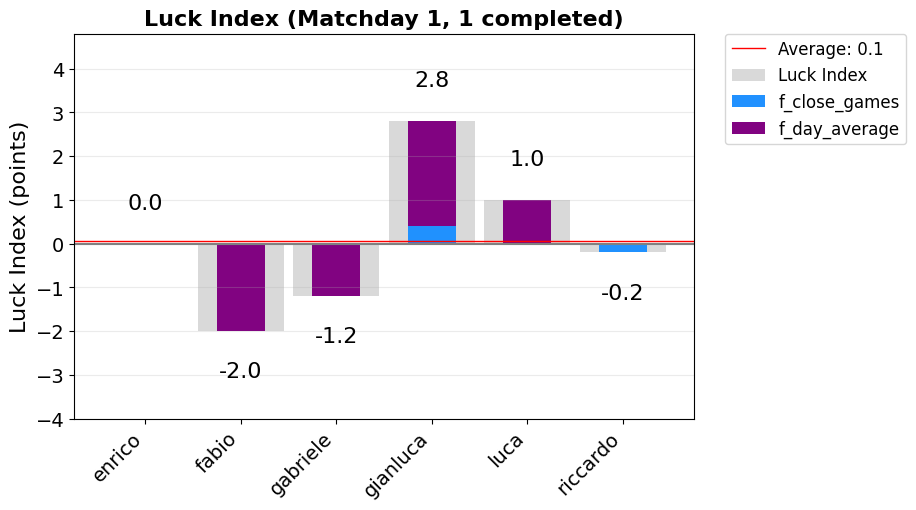

In [11]:
fanta.luck_index_plot(df_total, games, games_completed)

# Evolution Plots

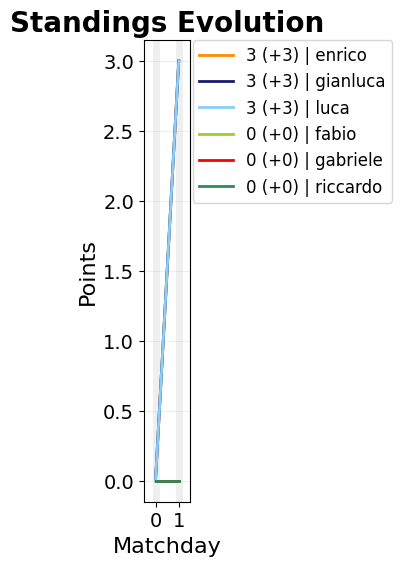

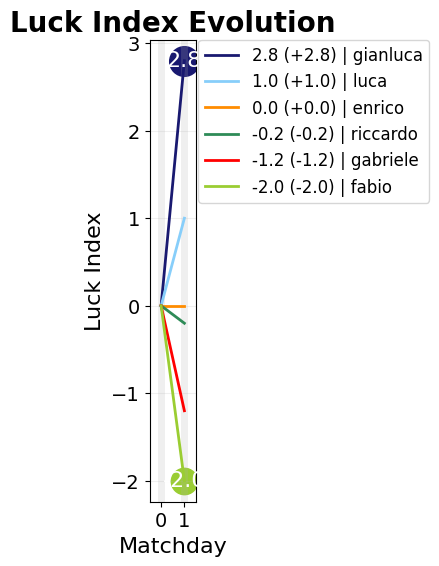

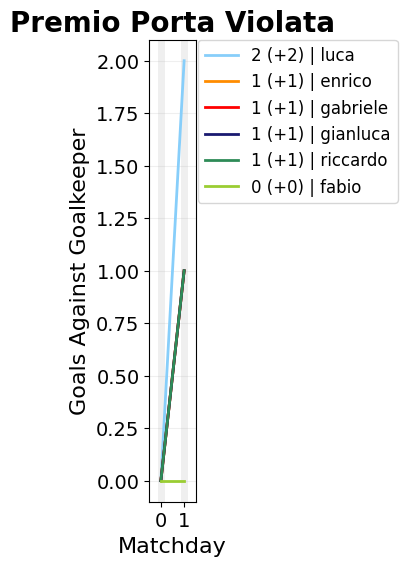

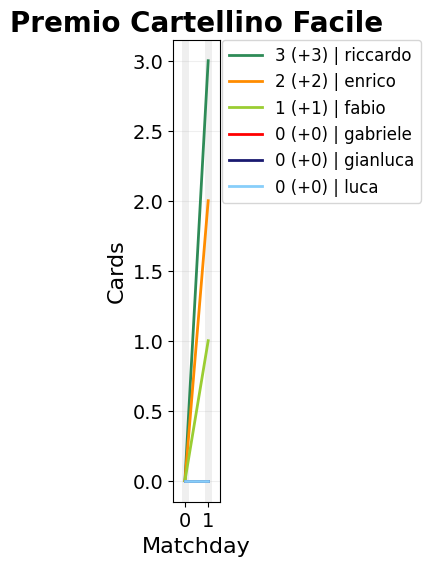

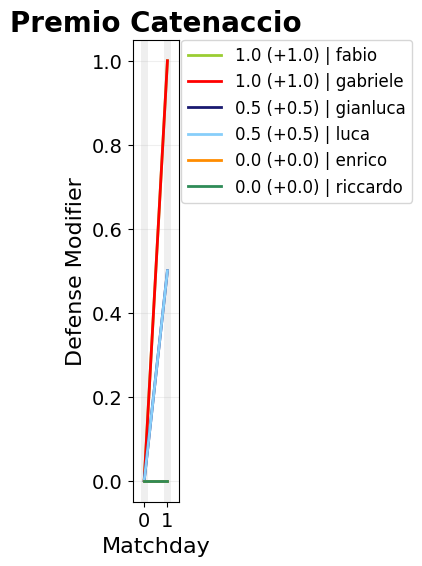

In [12]:
fanta.evo_plot(games, df_final, par='points', title='Standings Evolution', ylabel='Points', threshold=4)
fanta.evo_plot(games, df_final, par='Luck Index', title='Luck Index Evolution', ylabel='Luck Index', threshold=1.9)
fanta.evo_plot(games, df_final,
               par='goals against gk', title='Premio Porta Violata', ylabel='Goals Against Goalkeeper', threshold=2)
fanta.evo_plot(games, df_final,
               par='cards', title='Premio Cartellino Facile', ylabel='Cards', threshold=3)
fanta.evo_plot(games, df_final,
               par='defense modifier', title='Premio Catenaccio', ylabel='Defense Modifier', threshold=2) 

# Box plots

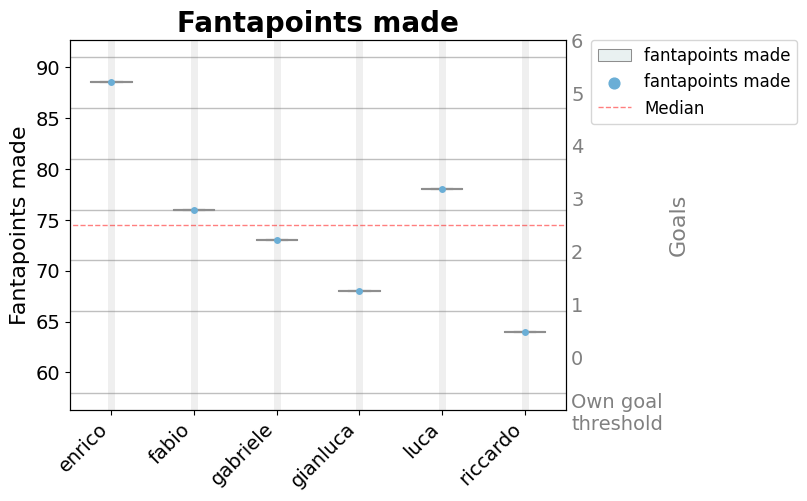

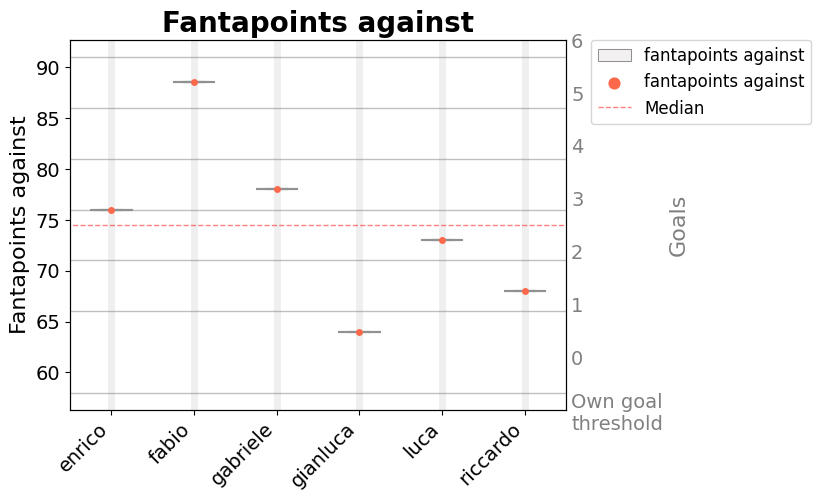

In [13]:
fanta.box_plot(df_final, fp_med,
               par='fantapoints made', label= 'Fantapoints made', title='Fantapoints made', col='cyan', pal='Blues')
fanta.box_plot(df_final, fp_med,
               par='fantapoints against', label= 'Fantapoints against', title='Fantapoints against', col='r', pal='Reds')

# Grahical display of results

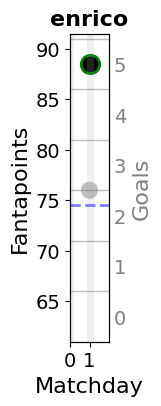

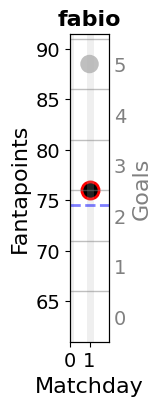

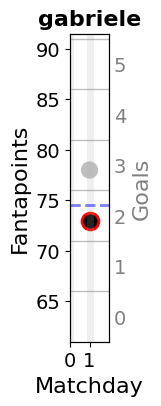

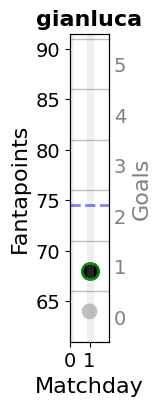

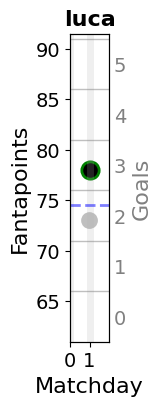

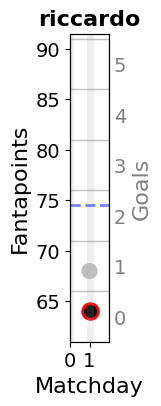

In [14]:
fanta.graphical_results(df_final, games, fp_med)

# Points and Goals vs Expected values

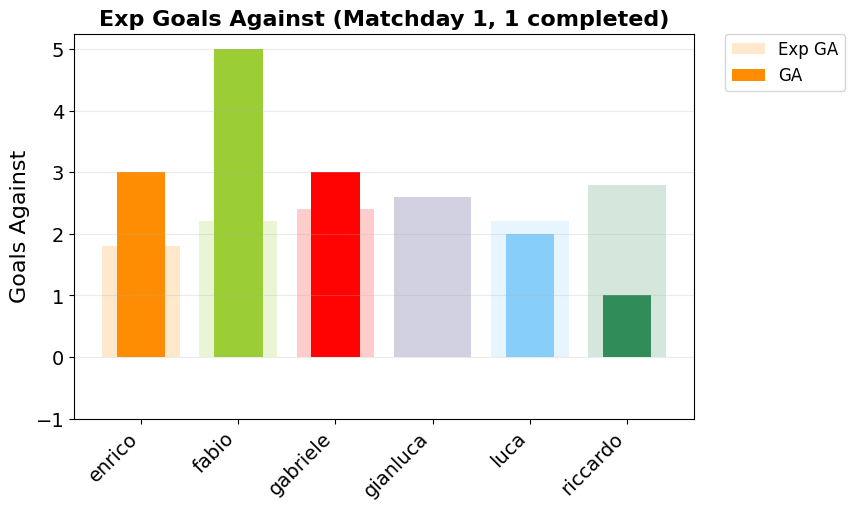

In [15]:
### Expected value of goals against, facing all other opponents ##############################
fanta.exp_goal_plot(df_total, games, games_completed)

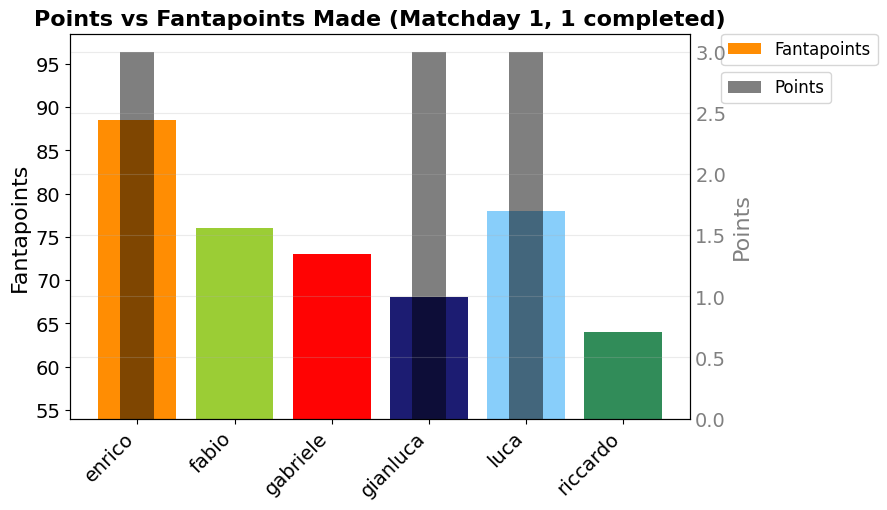

In [16]:
### Fantapoints made vs classification ###############
fanta.fantap_vs_class(df_total, games, games_completed)

# Stats & more

In [17]:
print('Fantapoints made:\n average =', fp_mean, '\n median =', fp_med, '\n standard deviation =', fp_std, 
      '\nGoals made:\n average =', gm_mean, '\n median =', gm_med, '\n standard deviation =', gm_std
     )

### Personal stats #####################################
personal_average = {}
for team, new_df in df_final.groupby(['team']):
    personal_average[team] = np.mean(new_df['fantapoints made'])
print('\n Personal Averages (Fantapoints):')
display(personal_average)

Fantapoints made:
 average = 74.58333333333333 
 median = 74.5 
 standard deviation = 7.801798225765363 
Goals made:
 average = 2.3333333333333335 
 median = 2.5 
 standard deviation = 1.5986105077709065

 Personal Averages (Fantapoints):


{'enrico': 88.5,
 'fabio': 76.0,
 'gabriele': 73.0,
 'gianluca': 68.0,
 'luca': 78.0,
 'riccardo': 64.0}

# Personal Data

In [18]:
gms = np.arange(1, games+1)

for team, new_df in df_final.groupby(['team']):
    print('Team:', config.Teams[team][0], '(',team,')')
    display(new_df.drop(['team'], axis=1).reindex(gms, fill_value='--'))
    print('\n\n')

Team: Gianlucanonpressare ( enrico )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,88.5,76.0,1,2,0.0,5,3,W,3,0.0,0.0,0.0





Team: Porti Chiusi Italiani ( fabio )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,76.0,88.5,0,1,1.0,3,5,L,0,0.0,-2.0,-2.0





Team: Sciagura ( gabriele )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,73.0,78.0,1,0,1.0,2,3,L,0,0.0,-1.2,-1.2





Team: La mamma di Enrico ( gianluca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,68.0,64.0,1,0,0.5,1,0,W,3,0.4,2.4,2.8





Team: Nottingham Forrest Gump ( luca )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,78.0,73.0,2,0,0.5,3,2,W,3,0.0,1.0,1.0





Team: Laggente ( riccardo )


,fantapoints made,fantapoints against,goals against gk,cards,defense modifier,GM,GA,result,points,f_close_games,f_day_average,Luck Index
Game,,,,,,,,,,,,
1,64.0,68.0,1,3,0.0,0,1,L,0,-0.2,0.0,-0.2


In [20]:
df_luck=df_final[['Luck Index', 'team']]
df_luck.to_csv('luck.csv')